In [198]:
IBM Applied Data Science Project

SyntaxError: invalid syntax (<ipython-input-198-2346c37a92d6>, line 1)

In [10]:
!conda config --set allow_conda_downgrades true
!conda install conda=4.6.14

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - conda=4.6.14


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.6.20          |     pyhd3eb1b0_3         155 KB
    conda-4.6.14               |           py37_0         1.9 MB
    ruamel_yaml-0.15.87        |   py37h7b6447c_1         245 KB
    ------------------------------------------------------------
                                           Total:         2.3 MB

The following NEW packages will be INSTALLED:

  conda              pkgs/main/linux-64::conda-4.6.14-py37_0
  pycosat            pkgs/main/linux-64::pycosat-0.6.3-py37h7b6447c_0
  ruamel_yaml        pkgs/main/linux-64::ruamel_yaml-0.15.87-py37h7b6447c_1

The following packages will be UPDATED:


In [11]:

!conda install -c conda-forge folium=0.5.0 --yes

import numpy as np 
import pandas as pd
import requests 
import os
import folium
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import seaborn as sns

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.14
  latest version: 4.9.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    certifi-2020.6.20          |   py37he5f6b98_2         151 KB  conda-forge
    conda-4.9.0                |   py37he5f6b98_1         3.0 MB  conda-forge
    conda-package-handling-1.7.2|   py37hb5d75c8_0         915 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1h             |       h516909a_0      

# FourSquare Credential

In [129]:
CLIENT_ID = 'CL25OWQYTUG0MYFH0REOZIQIVH2HV1ON25PST3CATJ350IMG' # your Foursquare ID
CLIENT_SECRET = 'VRXL2SSWGWIFWKKP0C3FIHTAFAVUJ3KJD0FINL4TJFYPXFTW   ' # your Foursquare Secret
VERSION = '20201101' # Foursquare API version

In [123]:
import json
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_details=[]
    try:
        venue_data=results['response']['groups'][0]['items']
        
        for row in venue_data:
            try:
                venue_id=row['venue']['id']
                venue_name=row['venue']['name']
                venue_category=row['venue']['categories'][0]['name']
                venue_details.append([venue_id,venue_name,venue_category])
            except KeyError:
                pass
    except:
        venue_details.append([0,0,0])
    df = pd.DataFrame(venue_details,columns=['ID','Name','Category'])
    return df


def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    
    venue_details=[]
    
    venue_data=results['response']['venue']
    try:    
    
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df
get_venue_details('4c0448d9310fc9b6bf1dc761')


,ID,Name,Likes,Rating,Tips
0,4c0448d9310fc9b6bf1dc761,Curry Spot,5,7.7,10


In [31]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_869227f9e7fb415fa432253d9ea969a1 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='UlPRiypAFCThFNZQUqq6PD9Ay9vh9aCKVNZS6q-0jQcj',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_869227f9e7fb415fa432253d9ea969a1.get_object(Bucket='capstoneproject-donotdelete-pr-q5w6f2dztlrwss',Key='data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


# Data Analysis

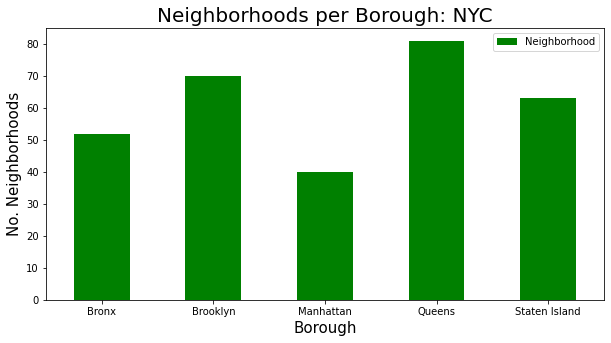

In [32]:
import matplotlib.pyplot as plt

df_data_1.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color="green")
plt.title('Neighborhoods per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

In [107]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
Indian_restaurants=pd.DataFrame(columns=column_names)
count=1
for row in df_data_1.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    print(venues['Category'])
    indian_restaurants=venues[venues['Category']=='Indian Restaurant']   
    
    for restaurants in indian_restaurants.values.tolist():
        id, name , category=restaurants
        Indian_restaurants = Indian_restaurants.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1
Indian_restaurants.to_csv("indian_restaurants_ny.csv")

0     Dessert Shop
1         Pharmacy
2         Pharmacy
3      Gas Station
4             Food
5    Deli / Bodega
Name: Category, dtype: object
0             Pizza Place
1             Post Office
2           Grocery Store
3              Restaurant
4          Baseball Field
5           Deli / Bodega
6          Sandwich Place
7      Chinese Restaurant
8     Fried Chicken Joint
9            Liquor Store
10     Salon / Barbershop
11                  Trail
12                   Park
13            Bus Station
14                    Bar
Name: Category, dtype: object
0                    Diner
1     Caribbean Restaurant
2              Pizza Place
3               Donut Shop
4       Seafood Restaurant
5     Caribbean Restaurant
6            Deli / Bodega
7       Chinese Restaurant
8                    Diner
9     Fast Food Restaurant
10    Caribbean Restaurant
11         Automotive Shop
12       Food & Drink Shop
13             Bus Station
14             Bus Station
15           Metro Station
16  

0               Pharmacy
1                 Market
2                    Gym
3            Pizza Place
4       Asian Restaurant
5             Playground
6            Bus Station
7          Deli / Bodega
8     Chinese Restaurant
9            Sports Club
10                  Food
11              Pharmacy
12           Bus Station
13         Metro Station
Name: Category, dtype: object
0              Gym / Fitness Center
1                               Gym
2                    Clothing Store
3                Mexican Restaurant
4                       Art Gallery
5                       Supermarket
6                        Donut Shop
7                    Sandwich Place
8                       Pizza Place
9                    Sandwich Place
10                    Grocery Store
11    Paper / Office Supplies Store
12                      Pizza Place
13                      Pizza Place
14                   Discount Store
15                    Deli / Bodega
16                         Pharmacy
Name: Ca

0                    Food
1    Caribbean Restaurant
2    Caribbean Restaurant
3                  Bakery
4           Deli / Bodega
5           Deli / Bodega
6             Pizza Place
7           Metro Station
8     Fried Chicken Joint
9       Convenience Store
Name: Category, dtype: object
0             Italian Restaurant
1                       Pharmacy
2                  Grocery Store
3                     Donut Shop
4                  Deli / Bodega
5                       Pharmacy
6                 Sandwich Place
7                    Pizza Place
8                    Pizza Place
9                           Café
10    Construction & Landscaping
11                   Bus Station
Name: Category, dtype: object
0       Spanish Restaurant
1      Fried Chicken Joint
2                   Bakery
3       Chinese Restaurant
4       Italian Restaurant
5     Caribbean Restaurant
6            Grocery Store
7      Fried Chicken Joint
8              Bus Station
9              Pizza Place
10            

0     Caribbean Restaurant
1                 Pharmacy
2              Supermarket
3     Fast Food Restaurant
4            Moving Target
5         Department Store
6        Food & Drink Shop
7             Liquor Store
8       Chinese Restaurant
9               Print Shop
10               Wine Shop
Name: Category, dtype: object
0              Grocery Store
1         Mexican Restaurant
2            Thai Restaurant
3                 Bagel Shop
4               Liquor Store
5            Thai Restaurant
6             Ice Cream Shop
7                Pizza Place
8              Grocery Store
9                       Café
10            Lingerie Store
11     Outdoors & Recreation
12       Japanese Restaurant
13                Donut Shop
14                Nail Salon
15                    Bakery
16            Ice Cream Shop
17            Sandwich Place
18         Mobile Phone Shop
19                 Racetrack
20                      Park
21    Furniture / Home Store
22               Pizza Place
23    

0         History Museum
1         Ice Cream Shop
2            Pizza Place
3            Yoga Studio
4          Deli / Bodega
             ...        
76         Deli / Bodega
77    Salon / Barbershop
78                   Bar
79    Chinese Restaurant
80     Mobile Phone Shop
Name: Category, Length: 81, dtype: object
0                        Playground
1                    Pilates Studio
2                     Deli / Bodega
3                               Bar
4                Spanish Restaurant
5                Italian Restaurant
6               Japanese Restaurant
7                Italian Restaurant
8                               Spa
9                         Gastropub
10                       Waterfront
11                        Bookstore
12                     Cocktail Bar
13               Seafood Restaurant
14              American Restaurant
15                      Men's Store
16                     Cocktail Bar
17                              Bar
18                French Restaurant

0    Asian Restaurant
1       Grocery Store
2              Lawyer
Name: Category, dtype: object
0              Caribbean Restaurant
1                    Discount Store
2     Paper / Office Supplies Store
3                              Park
4              Fast Food Restaurant
5                          Pharmacy
6              Fast Food Restaurant
7               Fried Chicken Joint
8                          Pharmacy
9               Fried Chicken Joint
10                      Bus Station
11                        Nightclub
Name: Category, dtype: object
0    Pool
Name: Category, dtype: object
0              Beach
1     Ice Cream Shop
2         Playground
3           Bus Stop
4    Harbor / Marina
Name: Category, dtype: object
0           Skating Rink
1       Baseball Stadium
2            Music Venue
3                  Beach
4       Baseball Stadium
5          Deli / Bodega
6    Fried Chicken Joint
7    Monument / Landmark
8                   Park
9             Food Stand
Name: Category, d

0          Pizza Place
1    Convenience Store
2             Pharmacy
3               Bakery
4          Pizza Place
5       Ice Cream Shop
6          Candy Store
7          Pizza Place
8           Bagel Shop
Name: Category, dtype: object
0                       Grocery Store
1                Caribbean Restaurant
2                Gym / Fitness Center
3                          Food Truck
4                Caribbean Restaurant
5                         Pizza Place
6           Latin American Restaurant
7                  Mexican Restaurant
8                    Department Store
9                       Grocery Store
10                   Video Game Store
11                     Clothing Store
12                  Mobile Phone Shop
13                        Wings Joint
14                      Women's Store
15               Caribbean Restaurant
16               Fast Food Restaurant
17                         Kids Store
18    Southern / Soul Food Restaurant
19                     Mattress Store
20 

0                  Cocktail Bar
1                  Cocktail Bar
2                          Café
3            Italian Restaurant
4                   Yoga Studio
5            Mexican Restaurant
6                      Wine Bar
7          Caribbean Restaurant
8                           Bar
9                   Pizza Place
10                   Smoke Shop
11                       Bakery
12          Japanese Restaurant
13           Mexican Restaurant
14                  Yoga Studio
15                Historic Site
16                  Coffee Shop
17     Mediterranean Restaurant
18                 Burger Joint
19            Indian Restaurant
20               Cosmetics Shop
21                   Food Truck
22                          Pub
23         Caribbean Restaurant
24    Latin American Restaurant
25                       School
26                  Pizza Place
27             Sushi Restaurant
28                  Coffee Shop
29                  Coffee Shop
30                         Café
31      

0                   Theater
1       Peruvian Restaurant
2                   Theater
3               Comedy Club
4      Gym / Fitness Center
              ...          
95              Pizza Place
96                    Diner
97    Performing Arts Venue
98                      Bar
99                  Theater
Name: Category, Length: 100, dtype: object
0                    Park
1                   Plaza
2              Smoke Shop
3             Salad Place
4       French Restaurant
             ...         
95         Clothing Store
96                 Lounge
97         Clothing Store
98    Tonkatsu Restaurant
99         Sandwich Place
Name: Category, Length: 100, dtype: object
0                Tea Room
1     Japanese Restaurant
2             Coffee Shop
3     Hawaiian Restaurant
4            Burger Joint
             ...         
60                    Bar
61                  Hotel
62       Sushi Restaurant
63          Women's Store
64               Pharmacy
Name: Category, Length: 65, dtype:

0         Monument / Landmark
1     New American Restaurant
2             Doctor's Office
3        Gym / Fitness Center
4                 Coffee Shop
               ...           
95         Chinese Restaurant
96                Beer Garden
97                Pizza Place
98         Mexican Restaurant
99               Liquor Store
Name: Category, Length: 100, dtype: object
0          Brazilian Restaurant
1                  Gourmet Shop
2            Seafood Restaurant
3                  Gourmet Shop
4                           Gym
5                           Gym
6     Middle Eastern Restaurant
7           Martial Arts School
8             Indian Restaurant
9                           Pub
10                   Restaurant
11                 Dessert Shop
12           Seafood Restaurant
13           Seafood Restaurant
14           Falafel Restaurant
15     Mediterranean Restaurant
16                   Hookah Bar
17    Middle Eastern Restaurant
18                        Diner
19             Gree

0             Dessert Shop
1                    Hotel
2              Coffee Shop
3             Cocktail Bar
4        Convenience Store
              ...         
66              Food Truck
67           Train Station
68                Boutique
69    Gym / Fitness Center
70         Automotive Shop
Name: Category, Length: 71, dtype: object
0                        Bakery
1                   Pizza Place
2           Peruvian Restaurant
3            Seafood Restaurant
4                        Bakery
5                       Theater
6     South American Restaurant
7            Chinese Restaurant
8                    Restaurant
9                 Grocery Store
10                  Coffee Shop
11                   Taco Place
12               Clothing Store
13           Chinese Restaurant
14                        Hotel
15         Fast Food Restaurant
16                    BBQ Joint
17                Deli / Bodega
Name: Category, dtype: object
0                    Donut Shop
1                Ice Cr

0               Japanese Restaurant
1                Chinese Restaurant
2               Peruvian Restaurant
3                  Greek Restaurant
4                   Bubble Tea Shop
5                Italian Restaurant
6                       Coffee Shop
7                Chinese Restaurant
8                 Health Food Store
9              Cantonese Restaurant
10                   Sandwich Place
11               Chinese Restaurant
12                   Shipping Store
13                      Supermarket
14                             Bank
15                   Ice Cream Shop
16               Italian Restaurant
17             Fast Food Restaurant
18                             Bank
19            Vietnamese Restaurant
20                       Donut Shop
21    Paper / Office Supplies Store
22                Korean Restaurant
23           Shabu-Shabu Restaurant
24               Athletics & Sports
25                              Spa
26                      Wings Joint
27                Korean Res

0      Deli / Bodega
1    Other Nightlife
2           Dive Bar
3        Pizza Place
Name: Category, dtype: object
0    Monument / Landmark
1                  Trail
2                  Beach
Name: Category, dtype: object
0                  Brewery
1     Gym / Fitness Center
2              Supermarket
3              Pizza Place
4         Sushi Restaurant
5                Nightclub
6               Playground
7           Discount Store
8       Rock Climbing Spot
9            Deli / Bodega
10        Greek Restaurant
11             Men's Store
12        Greek Restaurant
13             Pizza Place
14            Liquor Store
15      Chinese Restaurant
16          Baseball Field
17         Automotive Shop
18             Pizza Place
19     Rental Car Location
20              Soup Place
21          Baseball Field
22     Rental Car Location
Name: Category, dtype: object
0          Deli / Bodega
1            Pizza Place
2            Supermarket
3             Donut Shop
4           Dessert Shop
5    

0       Deli / Bodega
1    Recording Studio
Name: Category, dtype: object
0    Convenience Store
1        Grocery Store
2     Halal Restaurant
3          IT Services
4          Coffee Shop
Name: Category, dtype: object
0                       Museum
1    South American Restaurant
2                  Pizza Place
3                Deli / Bodega
4                          Gym
5         Caribbean Restaurant
6                    Hotel Bar
7           Mexican Restaurant
8                Deli / Bodega
9            Mobile Phone Shop
Name: Category, dtype: object
0            Bakery
1             Plaza
2              Park
3       Pizza Place
4        Playground
5    Ice Cream Shop
6            Bakery
Name: Category, dtype: object
0             Pizza Place
1        Tapas Restaurant
2        Baseball Stadium
3     Monument / Landmark
4            Burger Joint
5                 Theater
6                     Bar
7      Italian Restaurant
8      Italian Restaurant
9     American Restaurant
10       To

0        Sushi Restaurant
1               Juice Bar
2      Mexican Restaurant
3             Coffee Shop
4              Donut Shop
5                  Bakery
6                Pharmacy
7                   Diner
8      Miscellaneous Shop
9                    Bank
10          Grocery Store
11              Gift Shop
12    Martial Arts School
13             Bagel Shop
14           Liquor Store
15         Cosmetics Shop
16     Italian Restaurant
17     Chinese Restaurant
18               Pharmacy
19            Pizza Place
Name: Category, dtype: object
0    Home Service
1    Tennis Court
2        Bus Stop
3      Bath House
Name: Category, dtype: object
0                  Brewery
1                Gastropub
2                     Café
3       Mexican Restaurant
4         Recording Studio
5                     Pool
6     Caribbean Restaurant
7               Food Truck
8            Deli / Bodega
9                 Bus Stop
10                    Park
11             Pizza Place
12      Italian Restaura

Series([], Name: Category, dtype: object)
0             Steakhouse
1         Sandwich Place
2    Arts & Crafts Store
3                Theater
4               Bus Stop
5                   Park
6     Italian Restaurant
Name: Category, dtype: object
0    Theme Park
Name: Category, dtype: object
0         Sushi Restaurant
1                     Café
2          Thai Restaurant
3       Chinese Restaurant
4              Wings Joint
5              Pizza Place
6              Supermarket
7                    Diner
8               Hookah Bar
9       Tex-Mex Restaurant
10          Ice Cream Shop
11                Pharmacy
12     Japanese Restaurant
13          Sandwich Place
14          Mattress Store
15       Convenience Store
16              Donut Shop
17                    Bank
18             Pizza Place
19             Pizza Place
20                Bus Stop
21      Chinese Restaurant
22          Cosmetics Shop
23    Gym / Fitness Center
24                Bus Stop
25          Scenic Lookout
26   

0                    Bar
1            Pizza Place
2            Supermarket
3    Japanese Restaurant
4         Scenic Lookout
5             Playground
6     Chinese Restaurant
7       Halal Restaurant
8          Grocery Store
9                   Park
Name: Category, dtype: object
0                  Plaza
1     Italian Restaurant
2            Pizza Place
3          Bowling Alley
4                 Bakery
5            Supermarket
6                   Food
7             Laundromat
8     Chinese Restaurant
9             Playground
10           Bus Station
Name: Category, dtype: object
0     Caribbean Restaurant
1                      Gym
2           Discount Store
3            Grocery Store
4       Chinese Restaurant
5            Grocery Store
6      Fried Chicken Joint
7              Pizza Place
8                Gift Shop
9              Bus Station
10                  Bakery
11             Bus Station
Name: Category, dtype: object
0       Italian Restaurant
1              Coffee Shop
2      

0                               Beach
1                        Climbing Gym
2                         Salad Place
3                                 Gym
4                         Art Gallery
5                         Coffee Shop
6                         Men's Store
7                 American Restaurant
8                              Bakery
9                Other Great Outdoors
10                         Playground
11                     Scenic Lookout
12                     Sandwich Place
13                                Gym
14                      Deli / Bodega
15                       Antique Shop
16                        Art Gallery
17                          Wine Shop
18                        Yoga Studio
19                          Bookstore
20                         Boxing Gym
21                             Bakery
22                          Bookstore
23                 Italian Restaurant
24                        Yoga Studio
25             Furniture / Home Store
26          

0                   Park
1                  Hotel
2     Spanish Restaurant
3         Sandwich Place
4              Roof Deck
5                  Hotel
6         Baseball Field
7       Basketball Court
8     Athletics & Sports
9             Hotel Pool
10           Beer Garden
11              Platform
Name: Category, dtype: object
0        Sandwich Place
1    African Restaurant
2            Playground
3         Grocery Store
Name: Category, dtype: object


In [116]:
Indian_restaurants = pd.read_csv("indian_restaurants_ny.csv")
Indian_restaurants.drop(['Unnamed: 0'], axis=1,inplace=True)
Indian_restaurants

,Borough,Neighborhood,ID,Name
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot
1,Bronx,Unionport,4c194631838020a13e78e561,Melanies Roti Bar And Grill
2,Brooklyn,Bay Ridge,545835a1498e820edc6f636f,Bombay Grill
3,Brooklyn,Greenpoint,51a5445c498ee0f182370cb2,Agra Taj Mahal
4,Brooklyn,Bushwick,5169f5c4e4b0c7fcb77a0f3c,Agra Heights
5,Brooklyn,Brooklyn Heights,4b8ffc16f964a520246e33e3,Curry Heights
6,Brooklyn,Gowanus,52f18573498ec2c34e830ffd,Kanan's Indian Restaurant
7,Brooklyn,Fort Greene,57596dad498e732300496b23,Dosa Royale
8,Brooklyn,Clinton Hill,568d3902498e619efcbc3f58,Spice & Grill
9,Brooklyn,Clinton Hill,4ace7c86f964a520d3d020e3,Kinara's


In [117]:
print(Indian_restaurants.groupby('Borough')['ID'].count())

Borough
Bronx             2
Brooklyn         11
Manhattan        18
Queens            9
Staten Island     1
Name: ID, dtype: int64


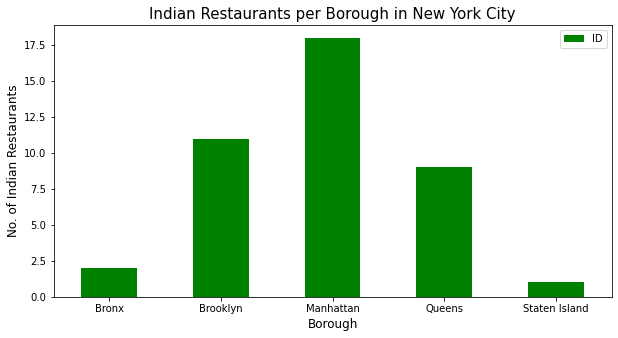

In [118]:
import matplotlib.pyplot as plt

Indian_restaurants.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color="green")
plt.title('Indian Restaurants per Borough in New York City',fontsize=15)
plt.xlabel('Borough', fontsize = 12)
plt.ylabel('No. of Indian Restaurants', fontsize=12)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

In [119]:
Indian_restaurants.groupby('Neighborhood')['ID'].count()

Neighborhood
Astoria                      1
Bay Ridge                    1
Bayside                      1
Boerum Hill                  1
Brooklyn Heights             1
Bushwick                     1
Carnegie Hill                1
Chelsea                      1
Civic Center                 2
Clinton Hill                 2
Fort Greene                  1
Gowanus                      1
Greenpoint                   1
Greenwich Village            3
Hamilton Heights             1
Jamaica Hills                2
Kew Gardens                  1
Long Island City             1
Manhattanville               1
Midtown                      1
New Dorp                     1
Noho                         1
North Side                   1
Prospect Lefferts Gardens    1
Rego Park                    1
Ridgewood                    1
Sunnyside Gardens            1
Sutton Place                 2
Tribeca                      1
Unionport                    1
Upper West Side              1
Washington Heights        

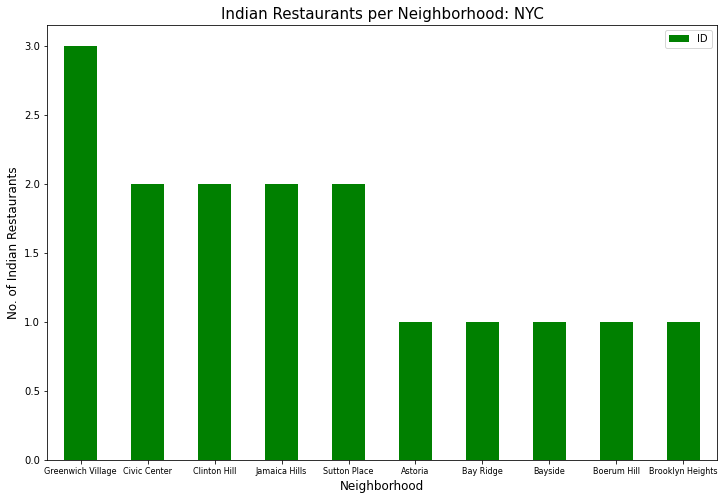

In [120]:
Indian_restaurants.groupby('Neighborhood')['ID'].count().nlargest(10).plot.bar(figsize=(12,8), color="green")
plt.title('Indian Restaurants per Neighborhood: NYC', fontsize = 15)
plt.xlabel('Neighborhood', fontsize = 12)
plt.ylabel('No. of Indian Restaurants', fontsize=12)
plt.xticks(rotation = 'horizontal', fontsize = 8)
plt.legend()
plt.show()

Greenwich Village neighbourhood has highest number of Indian Restaurant

In [131]:
stats=pd.DataFrame(columns=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips'])
count=1
for row in Indian_restaurants.values.tolist():
    if count == 50:
        break
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
        print(likes,rating,tips)

        
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    stats = stats.append({'Borough': Borough,
                                                    'Neighborhood': Neighborhood, 
                                                    'ID': id,
                                                    'Name' : name,
                                                    'Likes' : likes,
                                                    'Rating' : rating,
                                                    'Tips' : tips
                                                   }, ignore_index=True)
    count+=1
stats.tail()

5 7.7 10
3 6.5 2
14 7.3 4
34 7.2 17
12 5.8 5
31 7.2 17
24 7.7 8
78 8.6 24
21 7.9 6
9 5.6 20
40 8.0 14
83 8.7 49
95 8.4 29
46 8.1 25
33 7.8 17
73 7.6 18
14 7.0 11
14 6.9 9
831 8.6 256
109 8.7 44
81 8.3 20
472 8.7 140
256 8.8 120
600 9.1 150
122 8.6 27
7 8.5 4
10 7.9 2
25 7.5 13
No data available for id= 58855a59af7d1717fffdf996
3 6.1 6
38 8.1 12
29 7.9 14
27 8.1 9
157 8.8 35
53 8.2 20
97 7.5 44
10 7.4 6
No data available for id= 4c69c4b58e7c0f47d48de00f
155 8.3 58
186 8.4 83
17 7.6 16


,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
36,Queens,Jamaica Hills,4c434b2bd691c9b6ef8f8f0a,Sagar Restaurant,10,7.4,6
37,Queens,Jamaica Hills,0,0,0,0.0,0
38,Manhattan,Sutton Place,4a63bfb4f964a520b3c51fe3,Chola Eclectic Indian Cuisine,155,8.3,58
39,Manhattan,Sutton Place,4fe4fb50c2eee335e4fea69d,Moti Mahal Delux,186,8.4,83
40,Queens,Sunnyside Gardens,4c48da9f3013a59356c5f0e1,Saffron Garden,17,7.6,16


In [132]:
stats

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot,5,7.7,10
1,Bronx,Unionport,4c194631838020a13e78e561,Melanies Roti Bar And Grill,3,6.5,2
2,Brooklyn,Bay Ridge,545835a1498e820edc6f636f,Bombay Grill,14,7.3,4
3,Brooklyn,Greenpoint,51a5445c498ee0f182370cb2,Agra Taj Mahal,34,7.2,17
4,Brooklyn,Bushwick,5169f5c4e4b0c7fcb77a0f3c,Agra Heights,12,5.8,5
5,Brooklyn,Brooklyn Heights,4b8ffc16f964a520246e33e3,Curry Heights,31,7.2,17
6,Brooklyn,Gowanus,52f18573498ec2c34e830ffd,Kanan's Indian Restaurant,24,7.7,8
7,Brooklyn,Fort Greene,57596dad498e732300496b23,Dosa Royale,78,8.6,24
8,Brooklyn,Clinton Hill,568d3902498e619efcbc3f58,Spice & Grill,21,7.9,6
9,Brooklyn,Clinton Hill,4ace7c86f964a520d3d020e3,Kinara's,9,5.6,20


In [150]:
# from project_lib import Project
# project = Project(sc,"<my_project_id>","<my_project_token>")
# project.save_data(file_name = "stats.csv",data = stats.to_csv(index=False))



In [136]:
stats['Likes'] = stats['Likes'].astype('float64')
stats['Tips'] = stats['Tips'].astype('float64')
stats.describe()

,Likes,Rating,Tips
count,41.000000,41.000000,41.000000
mean,95.463415,7.441463,33.268293
std,168.400579,1.890367,50.287187
min,0.000000,0.000000,0.000000
25%,14.000000,7.300000,8.000000
50%,33.000000,7.900000,17.000000
75%,95.000000,8.400000,29.000000
max,831.000000,9.100000,256.000000


# Analysing restaurants

In [146]:
print("Restaurant with maximum Likes is",stats.iloc[stats['Likes'].idxmax()]['Name'])

Restaurant with maximum Likes is The Kati Roll Company


In [147]:
print("Restaurant with maximum rating is",stats.iloc[stats['Rating'].idxmax()]['Name'])

Restaurant with maximum rating is Tamarind TriBeCa


In [148]:
print("Restaurant which received most tips",stats.iloc[stats['Tips'].idxmax()]['Name'])

Restaurant which received most tips The Kati Roll Company


In [189]:
neighbourhood_stats=stats.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
neighbourhood_stats_count=stats.groupby('Neighborhood',as_index=False).count()[['Neighborhood','Rating']]
neighbourhood_stats_count.columns = ['Neighborhood','Count']
neighbourhood_stats.columns=['Neighborhood','Average Rating']
neighbourhood_stats.sort_values(['Average Rating'],ascending=False).head(10)
neighbourhood_stats=pd.merge(neighbourhood_stats,neighbourhood_stats_count, on='Neighborhood')
neighbourhood_stats

,Neighborhood,Average Rating,Count
0,Astoria,8.50,1
1,Bay Ridge,7.30,1
2,Bayside,8.10,1
3,Boerum Hill,8.00,1
4,Brooklyn Heights,7.20,1
5,Bushwick,5.80,1
6,Carnegie Hill,8.10,1
7,Chelsea,8.70,1
8,Civic Center,7.85,2
9,Clinton Hill,6.75,2


In [190]:
borough_stats=stats.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
borough_stats_count=stats.groupby('Borough',as_index=False).count()[['Borough','Rating']]
borough_stats.columns=['Borough','Average Rating']
borough_stats_count.columns = ['Borough','Count']
borough_stats=pd.merge(borough_stats,borough_stats_count, on='Borough')
borough_stats

,Borough,Average Rating,Count
0,Bronx,7.100000,2
1,Brooklyn,7.490909,11
2,Manhattan,8.194444,18
3,Queens,5.900000,9
4,Staten Island,7.900000,1


#### We can visualize all the neighbourhood which have average ratings of pizza places over 7.0

In [191]:
neighbourhood_stats=neighbourhood_stats[neighbourhood_stats['Average Rating']>=7.0]
neighbourhood_stats

,Neighborhood,Average Rating,Count
0,Astoria,8.50,1
1,Bay Ridge,7.30,1
2,Bayside,8.10,1
3,Boerum Hill,8.00,1
4,Brooklyn Heights,7.20,1
6,Carnegie Hill,8.10,1
7,Chelsea,8.70,1
8,Civic Center,7.85,2
10,Fort Greene,8.60,1
11,Gowanus,7.70,1


#### We can get the latitude and longitude of each location from the original dataframe

In [192]:
df_data_1

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
...,...,...,...,...
301,Manhattan,Hudson Yards,40.756658,-74.000111
302,Queens,Hammels,40.587338,-73.805530
303,Queens,Bayswater,40.611322,-73.765968
304,Queens,Queensbridge,40.756091,-73.945631


In [194]:
neighbour_stats=pd.merge(df_data_1,neighbourhood_stats, on='Neighborhood')
neighbour_stats=neighbour_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating','Count']]
neighbour_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating,Count
0,Bronx,Woodlawn,40.898273,-73.867315,7.70,1
1,Brooklyn,Bay Ridge,40.625801,-74.030621,7.30,1
2,Brooklyn,Greenpoint,40.730201,-73.954241,7.20,1
3,Brooklyn,Brooklyn Heights,40.695864,-73.993782,7.20,1
4,Brooklyn,Gowanus,40.673931,-73.994441,7.70,1
5,Brooklyn,Fort Greene,40.688527,-73.972906,8.60,1
6,Brooklyn,Boerum Hill,40.685683,-73.983748,8.00,1
7,Brooklyn,Prospect Lefferts Gardens,40.658420,-73.954899,8.70,1
8,Brooklyn,North Side,40.714823,-73.958809,8.40,1
9,Manhattan,Washington Heights,40.851903,-73.936900,8.10,1


In [195]:
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
rating = folium.map.FeatureGroup()

for lat, lng, in neighbour_stats[['Latitude','Longitude']].values:
    rating.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
neighbour_stats['Label']=neighbour_stats['Neighborhood']+', '+neighbour_stats['Borough']+'('+neighbour_stats['Average Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in neighbour_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add ratings to map
ny_map.add_child(rating)

# Conclusion

To have a best Indian food I would prefer going to Tamarind TriBeCa or The Kati Roll Company, as they have best rating and most number of likes respectively. If you want to start an Indian Restaurant(considering the owner has adequent cost), we need to prefer starting an Indian Restaurant in Manhattan as we can see people are generous with tips and also people love eating Indian Food we can know this from number of likes and rating restaurants in Manhattan got, therefore, it is advisable to start an Indian Restaurant in Manhattan. If cost is an issue and want to start with less competition Brooklyn will be the perfect bourough to start Indian Restaurants, as it has less competition and good amount of people who loves Indian Food.